<a href="https://colab.research.google.com/github/Bhuvana121/Employee-Attrition-Detection/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/bhuvana/Employee_Attrition_Prediction (1).csv')
df.head()

,Employee_ID,Age,Department,Salary,Years_at_Company,Job_Level,Job_Satisfaction,Work_Life_Balance,Performance_Rating,Overtime,Attrition
0,361fdc96-c01a-4e14-a2d3-33aaaae21ec4,29,Engineering,117195.520829,24.0,Senior,1,4,2.156620,No,No
1,b11c712f-09f4-4f9b-b15c-5dd97a835b09,24,HR,46602.054212,2.0,Mid,1,4,3.368112,Yes,No
2,ae4c2aaa-69fc-4baa-84b5-eabc28d17efa,29,HR,85940.752113,NaN,Entry,2,1,2.532553,No,No
3,eb4112dc-b58e-45ac-9505-a450581044ac,49,Sales,110821.156664,5.0,Lead,2,2,2.387184,Yes,No
4,e213ee88-62d2-469e-aa88-f32a9f45e0c8,59,Engineering,63762.299682,20.0,Lead,1,1,4.435929,Yes,Yes


In [6]:
# See the no. of rows and columns
df.shape

(1250, 11)

In [7]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Employee_ID', 'Age', 'Department', 'Salary', 'Years_at_Company', 'Job_Level', 'Job_Satisfaction', 'Work_Life_Balance', 'Performance_Rating', 'Overtime', 'Attrition']


In [8]:
# Display data type of each feature
df.dtypes

,0
Employee_ID,object
Age,int64
Department,object
Salary,float64
Years_at_Company,float64
Job_Level,object
Job_Satisfaction,int64
Work_Life_Balance,int64
Performance_Rating,float64
Overtime,object


In [9]:
df.describe()

,Age,Salary,Years_at_Company,Job_Satisfaction,Work_Life_Balance,Performance_Rating
count,1250.00000,1110.000000,1104.000000,1250.000000,1250.000000,1170.000000
mean,40.57280,75876.039617,14.745471,2.484800,2.464000,3.036305
std,10.87493,25876.032213,8.586685,1.106141,1.120048,1.161285
min,22.00000,30039.016080,1.000000,1.000000,1.000000,1.004324
25%,31.00000,53018.350683,7.000000,1.000000,1.000000,2.040992
50%,41.00000,76882.514389,15.000000,3.000000,2.000000,3.081748
75%,50.00000,97875.815840,22.000000,3.000000,3.000000,4.046968
max,59.00000,119908.635932,29.000000,4.000000,4.000000,4.996453


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         1250 non-null   object 
 1   Age                 1250 non-null   int64  
 2   Department          1250 non-null   object 
 3   Salary              1110 non-null   float64
 4   Years_at_Company    1104 non-null   float64
 5   Job_Level           1250 non-null   object 
 6   Job_Satisfaction    1250 non-null   int64  
 7   Work_Life_Balance   1250 non-null   int64  
 8   Performance_Rating  1170 non-null   float64
 9   Overtime            1250 non-null   object 
 10  Attrition           1250 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 107.5+ KB


In [11]:
# find the null values
df.isnull().sum()

,0
Employee_ID,0
Age,0
Department,0
Salary,140
Years_at_Company,146
Job_Level,0
Job_Satisfaction,0
Work_Life_Balance,0
Performance_Rating,80
Overtime,0


In [12]:
# Remove unwanted columns
df.drop(columns=['Employee_ID'], inplace=True)  # specify the columns to remove

In [13]:
df.head()

,Age,Department,Salary,Years_at_Company,Job_Level,Job_Satisfaction,Work_Life_Balance,Performance_Rating,Overtime,Attrition
0,29,Engineering,117195.520829,24.0,Senior,1,4,2.156620,No,No
1,24,HR,46602.054212,2.0,Mid,1,4,3.368112,Yes,No
2,29,HR,85940.752113,NaN,Entry,2,1,2.532553,No,No
3,49,Sales,110821.156664,5.0,Lead,2,2,2.387184,Yes,No
4,59,Engineering,63762.299682,20.0,Lead,1,1,4.435929,Yes,Yes


In [14]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns
cat_columns

Index(['Department', 'Job_Level', 'Overtime', 'Attrition'], dtype='object')

In [15]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [16]:
# find the null values
df.isnull().sum()

,0
Age,0
Department,0
Salary,0
Years_at_Company,0
Job_Level,0
Job_Satisfaction,0
Work_Life_Balance,0
Performance_Rating,0
Overtime,0
Attrition,0


In [17]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.head()

,Age,Department,Salary,Years_at_Company,Job_Level,Job_Satisfaction,Work_Life_Balance,Performance_Rating,Overtime,Attrition
0,29,0,117195.520829,24.000000,3,1,4,2.156620,0,0
1,24,1,46602.054212,2.000000,2,1,4,3.368112,1,0
2,29,1,85940.752113,14.745471,0,2,1,2.532553,0,0
3,49,3,110821.156664,5.000000,1,2,2,2.387184,1,0
4,59,0,63762.299682,20.000000,1,1,1,4.435929,1,1


In [19]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [20]:
df.head()

,Age,Department,Salary,Years_at_Company,Job_Level,Job_Satisfaction,Work_Life_Balance,Performance_Rating,Overtime,Attrition
0,0.189189,0,0.969811,0.821429,3,0.000000,1.000000,0.288642,0,0
1,0.054054,1,0.184301,0.035714,2,0.000000,1.000000,0.592112,1,0
2,0.189189,1,0.622032,0.490910,0,0.333333,0.000000,0.382811,0,0
3,0.729730,3,0.898882,0.142857,1,0.333333,0.333333,0.346397,1,0
4,1.000000,0,0.375247,0.678571,1,0.000000,0.000000,0.859593,1,1


In [21]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Attrition', axis=1)  # -- independent variable
y = df['Attrition'] # -- dependent variable

In [22]:
X

,Age,Department,Salary,Years_at_Company,Job_Level,Job_Satisfaction,Work_Life_Balance,Performance_Rating,Overtime
0,0.189189,0,0.969811,0.821429,3,0.000000,1.000000,0.288642,0
1,0.054054,1,0.184301,0.035714,2,0.000000,1.000000,0.592112,1
2,0.189189,1,0.622032,0.490910,0,0.333333,0.000000,0.382811,0
3,0.729730,3,0.898882,0.142857,1,0.333333,0.333333,0.346397,1
4,1.000000,0,0.375247,0.678571,1,0.000000,0.000000,0.859593,1
...,...,...,...,...,...,...,...,...,...
1245,0.351351,1,0.510039,0.490910,1,0.333333,1.000000,0.210389,0
1246,0.000000,1,0.577901,0.490910,0,1.000000,1.000000,0.417925,1
1247,0.567568,2,0.510039,0.321429,2,0.666667,0.666667,0.797601,0
1248,0.648649,3,0.510039,0.035714,1,0.666667,0.000000,0.545383,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [31]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.46
Logistic Regression Confusion Matrix:
 [[63 56]
 [79 52]]


In [28]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [32]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.488
Random Forest Confusion Matrix:
 [[65 54]
 [74 57]]


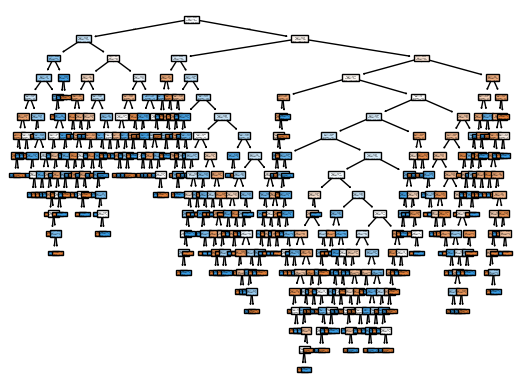

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [34]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [ ]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")